### Importación de datos



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [32]:
#Lista con los DataFrames de cada tienda
tiendas = [tienda, tienda2, tienda3, tienda4]
num_tiendas = [f"tienda {i+1}" for i in range(len(tiendas))]
ingresos = [t['Precio'].sum() for t in tiendas]
for num_tienda, ingreso in zip(num_tiendas, ingresos):
    print(f"Ingreso total de la {num_tienda} es: $ {ingreso}")


Ingreso total de la tienda 1 es: $ 1150880400.0
Ingreso total de la tienda 2 es: $ 1116343500.0
Ingreso total de la tienda 3 es: $ 1098019600.0
Ingreso total de la tienda 4 es: $ 1038375700.0


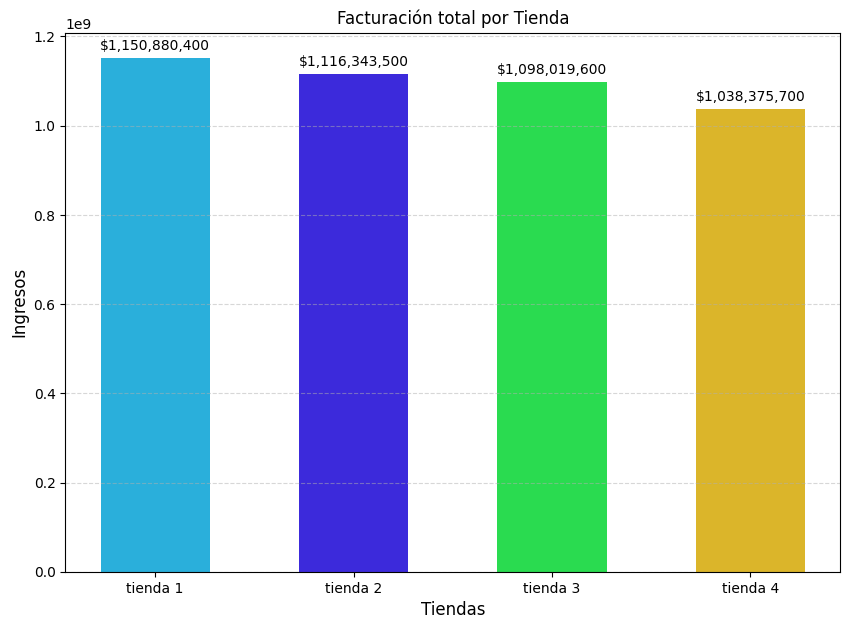

In [33]:
plt.figure(figsize=(10, 7))
colores = ['#2AAFDB', '#3C2ADB', '#2ADB50', '#DBB52A']
barras = plt.bar(num_tiendas, ingresos, width=0.55, color=colores)

plt.title('Facturación total por Tienda')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for barra in barras:
    valory = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             valory + (valory*0.01),
             f"${valory:,.0f}",
             ha='center', va='bottom',
)

plt.show()

# 2. Ventas por categoría

In [34]:
#Agregar columna "Tienda" a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#sumar precios por tienda y categoria
facturaciontienda = (
    df_tiendas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index(name='Facturación Total')
)
print(facturaciontienda)

      Tienda   Categoría del Producto  Facturación Total
0   Tienda 1  Artículos para el hogar         12698400.0
1   Tienda 1     Deportes y diversión         39290000.0
2   Tienda 1        Electrodomésticos        363685200.0
3   Tienda 1             Electrónicos        429493500.0
4   Tienda 1   Instrumentos musicales         91299000.0
5   Tienda 1                 Juguetes         17995700.0
6   Tienda 1                   Libros          8784900.0
7   Tienda 1                  Muebles        187633700.0
8   Tienda 2  Artículos para el hogar         14746900.0
9   Tienda 2     Deportes y diversión         34744500.0
10  Tienda 2        Electrodomésticos        348567800.0
11  Tienda 2             Electrónicos        410831100.0
12  Tienda 2   Instrumentos musicales        104990300.0
13  Tienda 2                 Juguetes         15945400.0
14  Tienda 2                   Libros         10091200.0
15  Tienda 2                  Muebles        176426300.0
16  Tienda 3  Artículos para el

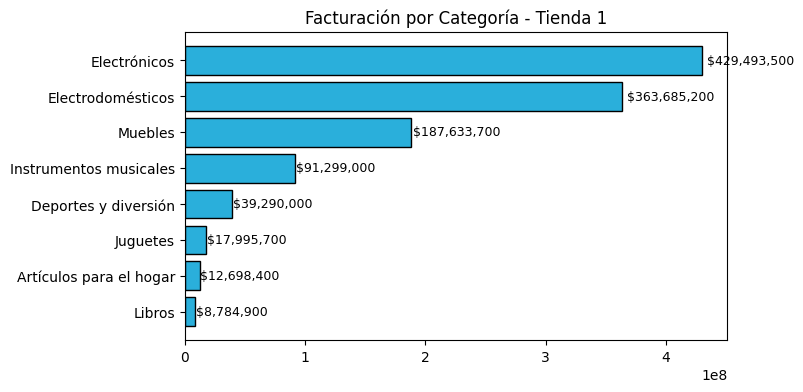

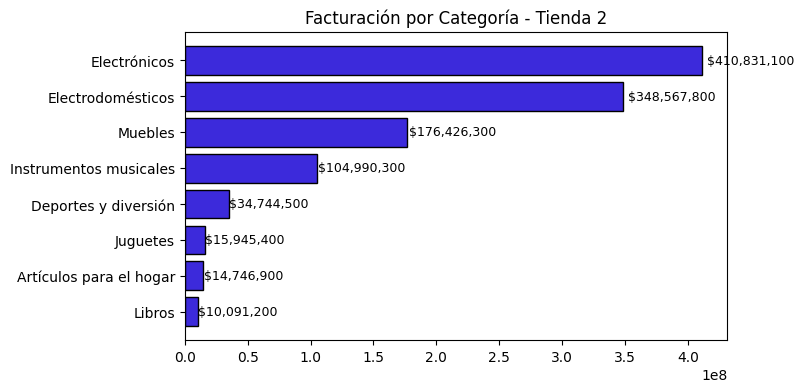

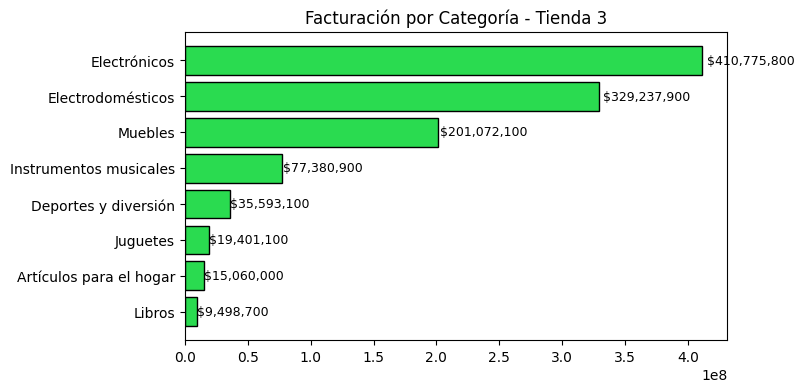

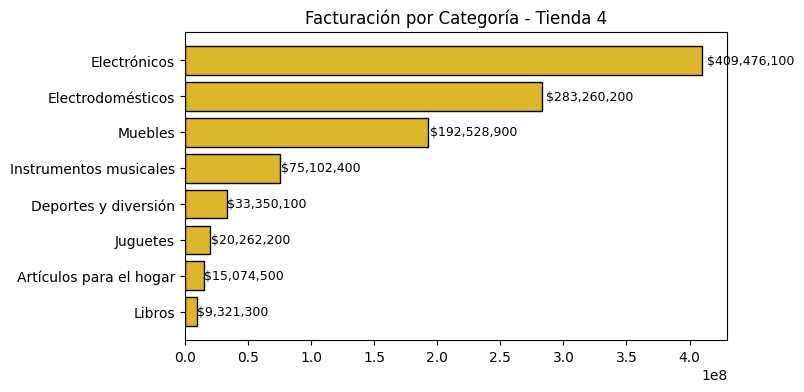

In [35]:
# Colores y tiendas
tiendas = facturaciontienda['Tienda'].unique()
colores = ['#2AAFDB', '#3C2ADB', '#2ADB50', '#DBB52A']

for tienda, color in zip(tiendas, colores):
    df = (facturaciontienda[facturaciontienda['Tienda'] == tienda]
          .sort_values('Facturación Total', ascending=False))

    plt.figure(figsize=(7, 4))
    barras = plt.barh(df['Categoría del Producto'], df['Facturación Total'],
                      color=color, edgecolor="black")

    plt.title(f'Facturación por Categoría - {tienda}')
    plt.gca().invert_yaxis()

    for b in barras:
        v = b.get_width()
        plt.text(v + v*0.01, b.get_y()+b.get_height()/2, f"${v:,.0f}",
                 va='center', fontsize=9)
    plt.show()




# 3. Calificación promedio de la tienda


In [36]:
#calcular promedio de calificaciones por tienda
promedioTienda = df_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()
promedioTienda['Calificación'] = promedioTienda['Calificación']
print(promedioTienda)

     Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


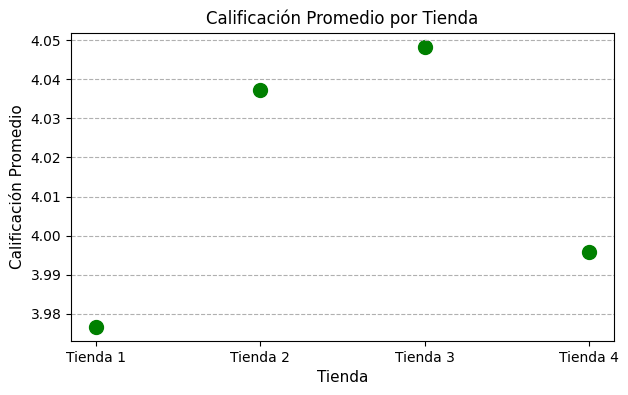

In [37]:
#calificación promedio por tienda
plt.figure(figsize=(7, 4))
plt.scatter(promedioTienda['Tienda'], promedioTienda['Calificación'], color='green', s=100)

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda', fontsize=11)
plt.ylabel('Calificación Promedio', fontsize=11)
plt.grid(axis='y', linestyle='--')
plt.show()

# 4. Productos más y menos vendidos

In [38]:
#Obtener categorías con valores extremos
cantidades_por_categoria = (
    df.groupby(["Tienda", "Categoría del Producto"])['Facturación Total']
    .sum()
    .reset_index()
)

def obtener_extremos(datos, modo='max'):
    if modo == 'max':
        valor = datos['Facturación Total'].max()
    else:
        valor = datos['Facturación Total'].min()

    categorias = datos[datos['Facturación Total'] == valor]['Categoría del Producto'].tolist()
    return categorias, valor

    print(facturaciontienda['Tienda'].unique())

resumen_tiendas = []

for tienda_nombre in facturaciontienda['Tienda'].unique():
    subset = facturaciontienda[facturaciontienda['Tienda'] == tienda_nombre]

    cat_mayor, val_mayor = obtener_extremos(subset, 'max')
    cat_menor, val_menor = obtener_extremos(subset, 'min')

    resumen_tiendas.append({
        'Tienda': tienda_nombre,
        'Categoria_Mayor': "\n".join(cat_mayor),
        'Cantidad_Mayor': val_mayor,
        'Categoria_Menor': "\n".join(cat_menor),
        'Cantidad_Menor': val_menor
    })

tabla_resumen = pd.DataFrame(resumen_tiendas)

#DataFrame final
tabla_resumen = pd.DataFrame(resumen_tiendas)

print("Categorías extremas por tienda:")
print(tabla_resumen)


Categorías extremas por tienda:
     Tienda Categoria_Mayor  Cantidad_Mayor Categoria_Menor  Cantidad_Menor
0  Tienda 1    Electrónicos     429493500.0          Libros       8784900.0
1  Tienda 2    Electrónicos     410831100.0          Libros      10091200.0
2  Tienda 3    Electrónicos     410775800.0          Libros       9498700.0
3  Tienda 4    Electrónicos     409476100.0          Libros       9321300.0


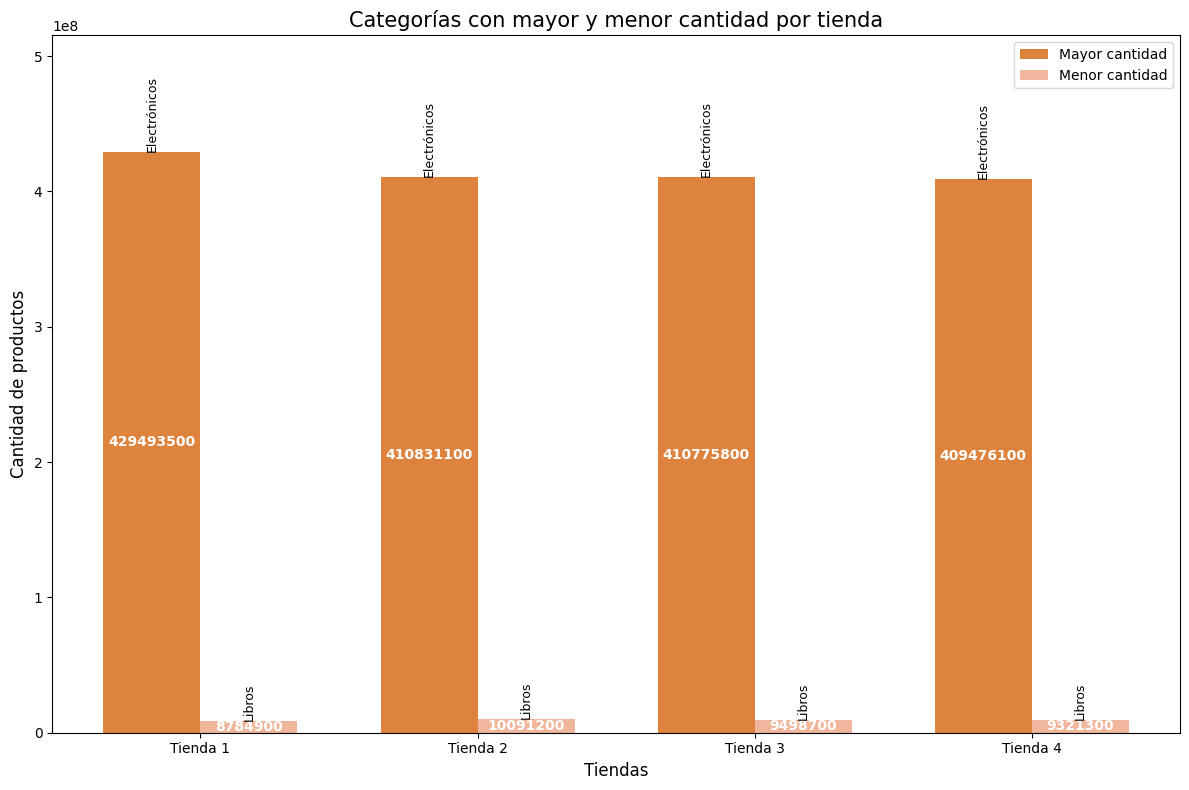

In [40]:
# Extraer los datos del DataFrame con los extremos
tiendas = tabla_resumen['Tienda'].tolist()
cantidades_mayor = tabla_resumen['Cantidad_Mayor'].tolist()
cantidades_menor = tabla_resumen['Cantidad_Menor'].tolist()
categorias_mayor = tabla_resumen['Categoria_Mayor'].tolist()
categorias_menor = tabla_resumen['Categoria_Menor'].tolist()
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(tiendas))


#barras
bars_mayor = ax.bar(x - width/2, cantidades_mayor, width, label='Mayor cantidad', color='#DE833E')
bars_menor = ax.bar(x + width/2, cantidades_menor, width, label='Menor cantidad', color='#F0B79C')

#Configuración de título
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylabel('Cantidad de productos', fontsize=12)
ax.set_title('Categorías con mayor y menor cantidad por tienda', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

#Función auxiliar para añadir etiquetas en las barras
def add_labels(barras, categorias, color_texto="white"):
    for bar, categoria in zip(barras, categorias):
        altura = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, altura/2,
                f'{int(altura)}', ha='center', va='center',
                fontsize=10, color=color_texto, fontweight='bold')
        ax.text(bar.get_x() + bar.get_width()/2, altura + 0.3,
                categoria, ha='center', va='bottom',
                fontsize=9, color='black', rotation=90)

#etiquetas a ambas series de barras
add_labels(bars_mayor, categorias_mayor, color_texto="white")
add_labels(bars_menor, categorias_menor, color_texto="white")
plt.ylim(0, max(max(cantidades_mayor), max(cantidades_menor)) * 1.2)

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [29]:
#calcular promedio de costos de envío por tienda
promedio_tienda = df_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()
promedio_tienda['Costo de envío'] = promedio_tienda['Costo de envío']
print(promedio_tienda)


     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


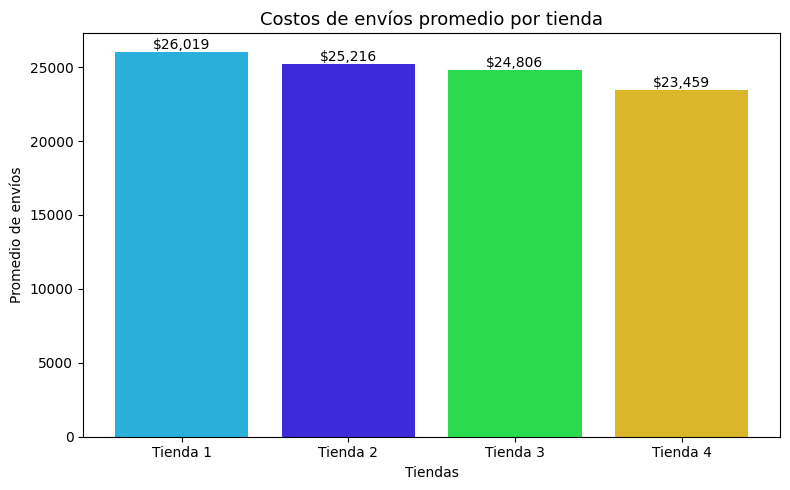

In [30]:
colores_tiendas = {
    'Tienda 1': '#2AAFDB',
    'Tienda 2': '#3C2ADB',
    'Tienda 3': '#2ADB50',
    'Tienda 4': '#DBB52A'
}

plt.figure(figsize=(8, 5))

#barras
barras = plt.bar(
    promedio_tienda['Tienda'],
    promedio_tienda['Costo de envío'],
    color=[colores_tiendas[t] for t in promedio_tienda['Tienda']],
)
plt.title('Costos de envíos promedio por tienda', fontsize=13)
plt.xlabel('Tiendas')
plt.ylabel('Promedio de envíos')

#etiquetas en las barras
for barra in barras:
    valory = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        valory, f"${valory:,.0f}", ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

## 6. Conlcusiones

El análisis de desempeño de las tiendas revela que Tienda 4 se encuentra en una posición económica débil, registrando ingresos totales de apenas 1,038,375, significativamente menores que los de sus competidoras; aunque sus ventas por categoría no son drásticamente inferiores, mantienen un patrón constante de menor facturación, lo que contribuye a su limitado rendimiento financiero. Sorprendentemente, los clientes mantienen una percepción positiva de esta tienda, reflejada en altas calificaciones, lo que sugiere que la baja performance no está relacionada con la calidad del servicio o la experiencia de compra, sino más bien con factores externos como la ubicación, la demanda de la zona o la efectividad de sus estrategias comerciales. En cuanto a logística, Tienda 1 incurre en el costo promedio de envío más elevado 25,018.61, mientras que Tienda 4 opera con un costo menor 23,459.4, aunque esta ventaja no alcanza a compensar la baja rotación de productos y la limitada facturación. Así, Tienda 4 combina clientes satisfechos y costos competitivos con un desempeño económico insuficiente, señalando la necesidad de revisar su modelo operativo o considerar ajustes estratégicos dentro del portafolio de tiendas.